In [2]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dataset = randn(25)

(0.0, 1.0)

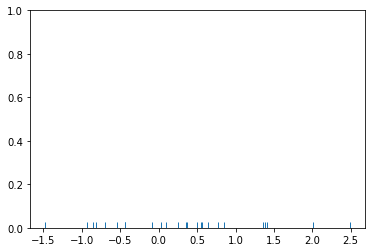

In [5]:
sns.rugplot(dataset)

plt.ylim(0,1)

<AxesSubplot:>

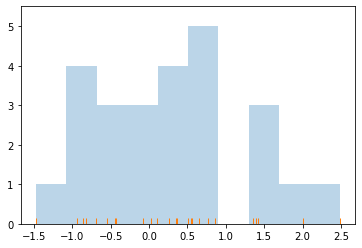

In [7]:
plt.hist(dataset, alpha=0.3) # include histogram into the dataset
sns.rugplot(dataset)

(0.0, 1.0)

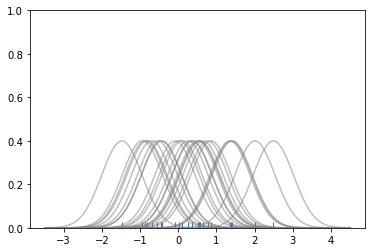

In [10]:
# Galcium basis function
sns.rugplot(dataset)

x_min = dataset.min() - 2 # -2 and +2 is to give some range outside of the dataset
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100) # 100 space points from x_min to x_max

# practical estimation equation of the bandwidth ((4 x (standard deviation of the dataset)) by the power of 5 / (3 x (number of points in the dataset))) by the power of 0.2 (1 over 5)
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and append it to the kernel list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4

    plt.plot(x_axis, kernel, color='grey', alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

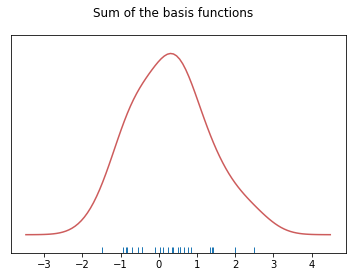

In [11]:
# Kernel Density Estimation Plot creation
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

<AxesSubplot:ylabel='Density'>

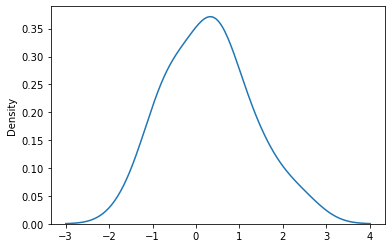

In [12]:
# Kernel Density Estimation Plot by Seaborn
sns.kdeplot(dataset)

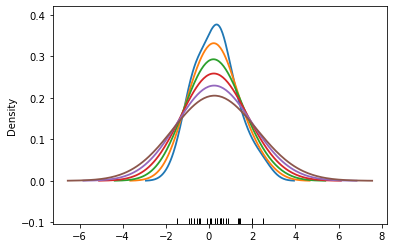

In [16]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw_method=bw, lw=1.8, label=bw)

In [ ]:
url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'
explanation = 'https://www.youtube.com/watch?v=DCgPRaIDYXA&ab_channel=KimberlyFessel'

/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  wa

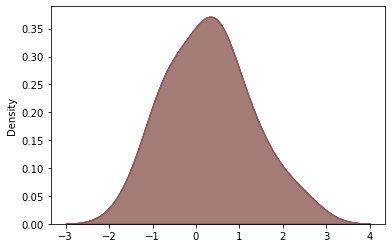

In [18]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)

/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

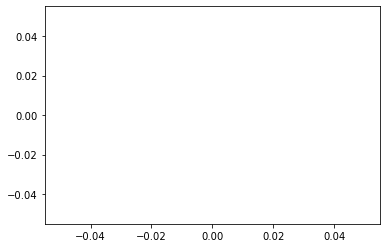

In [22]:
sns.kdeplot(dataset, y=True)

In [23]:
url = 'https://en.wikipedia.org/wiki/Cumulative_distribution_function'

<AxesSubplot:ylabel='Density'>

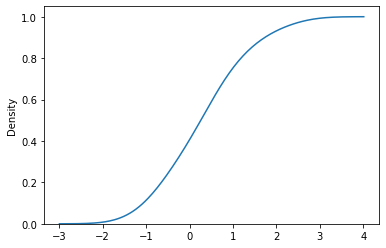

In [24]:
sns.kdeplot(dataset, cumulative=True)

<AxesSubplot:xlabel='X', ylabel='Y'>

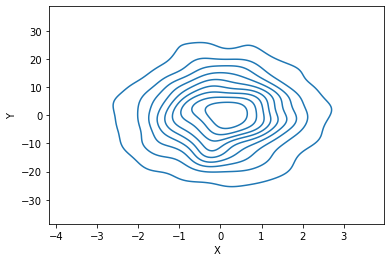

In [31]:
mean = [0,0]

cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X','Y'])

sns.kdeplot(data=dframe,x='X',y='Y')

/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='X', ylabel='Y'>

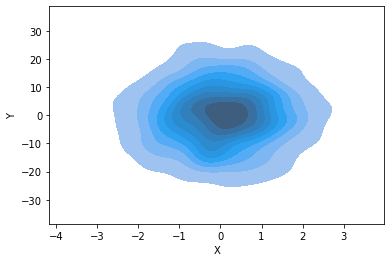

In [32]:
sns.kdeplot(dframe.X, dframe.Y, shade=True) # passing two vectors separately

<AxesSubplot:xlabel='X', ylabel='Y'>

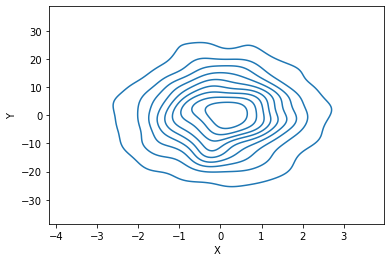

In [40]:
sns.kdeplot(data=dframe,x='X',y='Y', bw_adjust=1) # specify bandwith

<AxesSubplot:xlabel='X', ylabel='Y'>

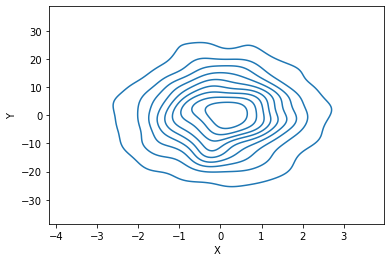

In [42]:
sns.kdeplot(data=dframe, x='X', y='Y', bw_method='silverman') # use silverman estimation bandwidth (silverman rule of thumb)

/Users/amescua/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


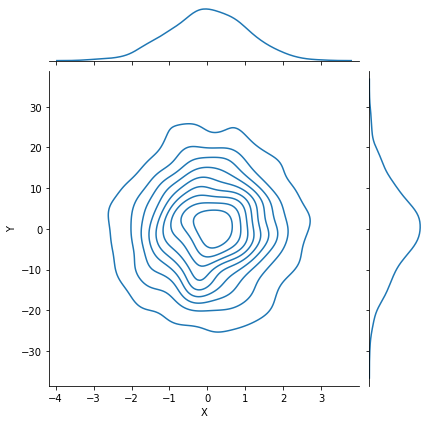

In [43]:
sns.jointplot('X','Y',dframe,kind='kde') # specifying Kernel Density Estimation Plot